In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import scipy.stats as stats

#### Importing the dataset

In [3]:
Electricity_consumption = pd.read_csv(r'C:\Users\user\Desktop\13. Capstone Case Study - Demand Estimation\Electricity Consumption.csv')

In [4]:
Electricity_consumption.head(2)

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334


In [5]:
Electricity_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
Electricity_consumption['DATE'] = pd.to_datetime(Electricity_consumption['DATE'])

In [7]:
Electricity_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [8]:
# Checking for missing values

Electricity_consumption.isna().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [9]:
# Checking for duplicates

Electricity_consumption[Electricity_consumption.duplicated()]

,DATE,Electricty_Consumption_in_TW


In [10]:
# Visual Representation

start_date = Electricity_consumption['DATE'].min()
start_date

Timestamp('1973-01-01 00:00:00')

In [11]:
end_date = Electricity_consumption['DATE'].max()
end_date

Timestamp('2019-09-01 00:00:00')

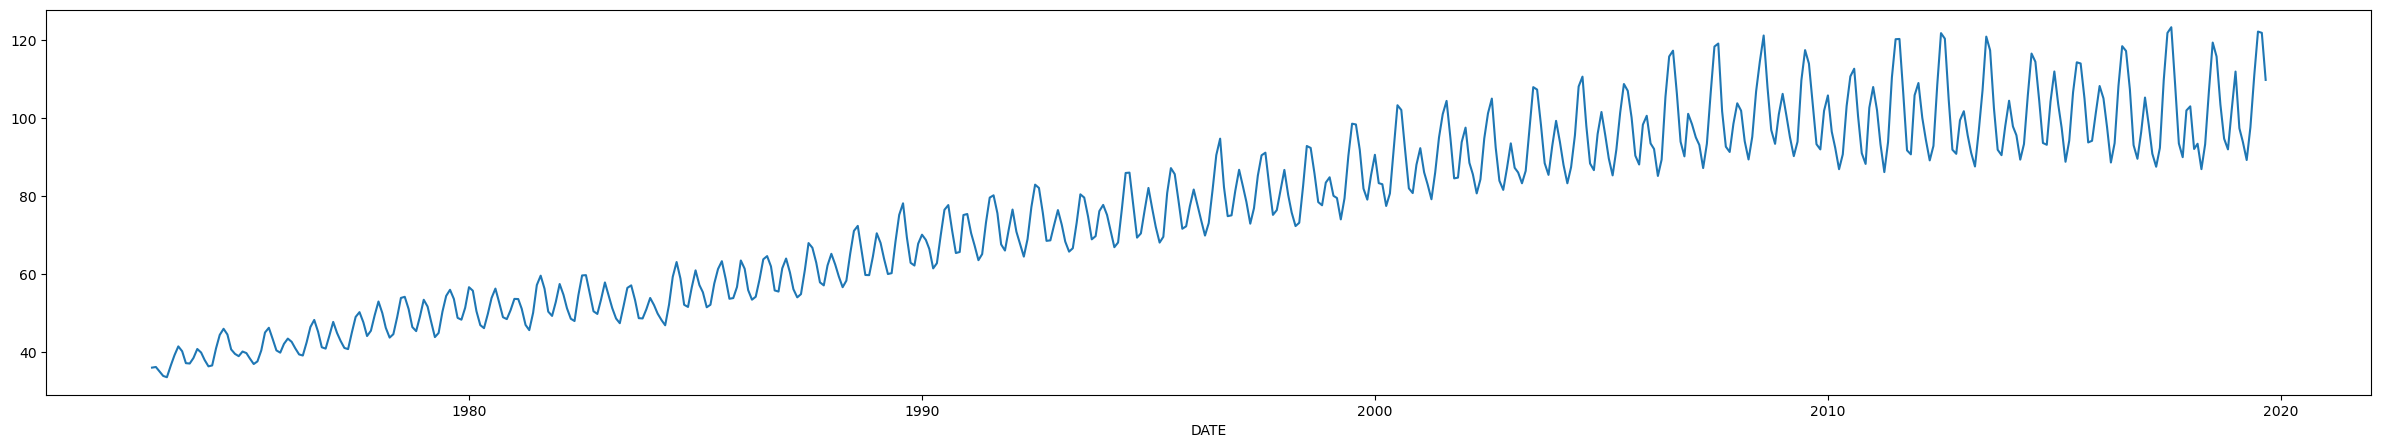

In [12]:
plt.figure(figsize = (30,5))
plt.plot(Electricity_consumption['DATE'],Electricity_consumption['Electricty_Consumption_in_TW'])
plt.xlabel('DATE')
plt.show()

In [13]:
# set date column as index

Electricity_consumption.set_index('DATE',inplace=True)

In [14]:
Electricity_consumption.head(2)

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334


In [15]:
# Importing seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decomposition = seasonal_decompose(Electricity_consumption,model='additive')

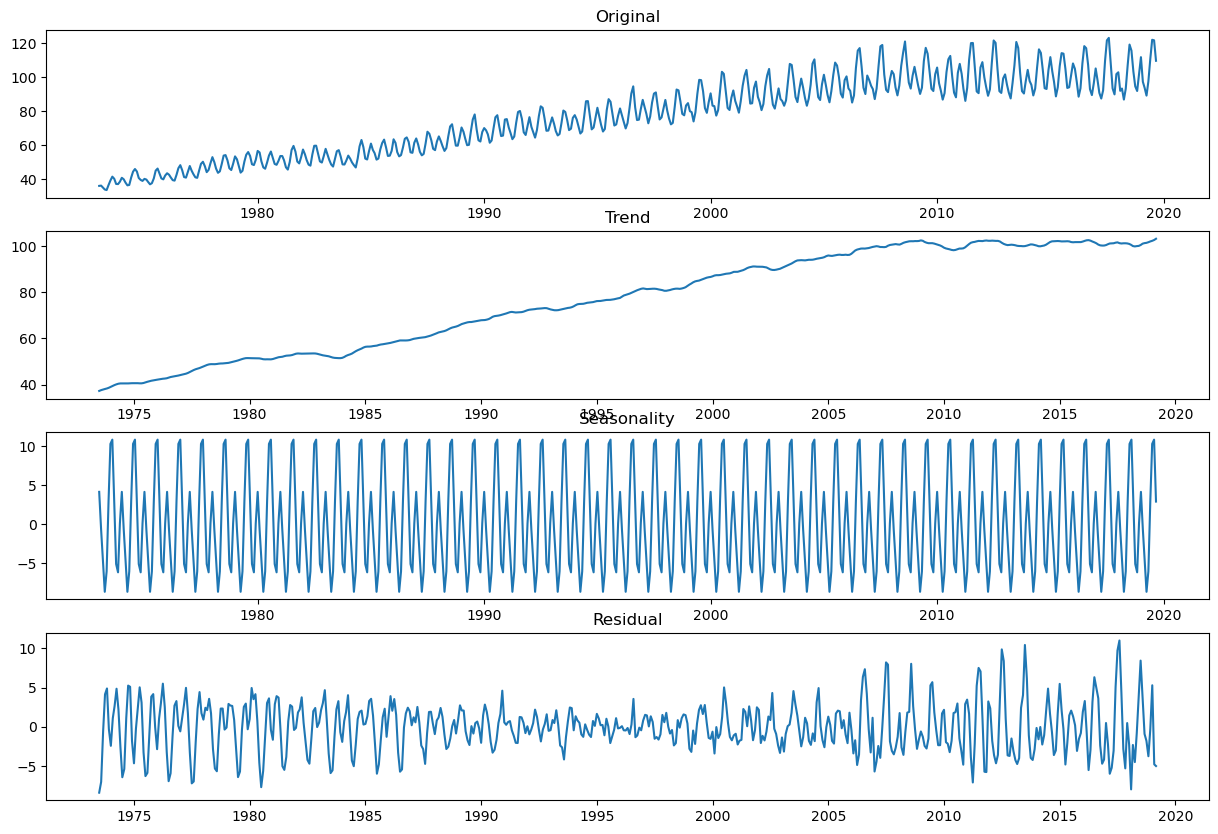

In [17]:
# Plotting the decompostition

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(Electricity_consumption)
plt.title('Original')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.show()

In [18]:
# Stationarity in data

# H0 : The data is not stationary
# H1 : The data is stationary

In [19]:
# Importing adfuller to do adf test

from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(Electricity_consumption.dropna())

In [21]:
result

(-1.7405933729832554,
 0.41032816044686227,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [22]:
print('ADF Statistic: ',result[0])
print('p-value: ',result[1])

if result[1]<0.05:
    print('reject the null hypothesis,This means the series does not have a unit root, and no further transformations (like differencing) are needed.')
else:
    print('fail to reject the null hypothesis, might need to apply transformations, like differencing, to make the series stationary.')

ADF Statistic:  -1.7405933729832554
p-value:  0.41032816044686227
fail to reject the null hypothesis, might need to apply transformations, like differencing, to make the series stationary.


In [23]:
for key, value in result[4].items():
    print('Critical Value -',key,': ',value)

Critical Value - 1% :  -3.442405720052601
Critical Value - 5% :  -2.866857804790472
Critical Value - 10% :  -2.5696022094099824


In [24]:
# Differencing

Electricity_consumption['Electricty_Consumption_in_TW_1Month_Difference'] = Electricity_consumption['Electricty_Consumption_in_TW'] - Electricity_consumption['Electricty_Consumption_in_TW'].shift(1)

In [25]:
# Seasonal Difference

Electricity_consumption['Electricty_Consumption_in_TW_Seasonal_Difference'] = Electricity_consumption['Electricty_Consumption_in_TW'] - Electricity_consumption['Electricty_Consumption_in_TW'].shift(12)

In [26]:
Electricity_consumption.head(2)

,Electricty_Consumption_in_TW,Electricty_Consumption_in_TW_1Month_Difference,Electricty_Consumption_in_TW_Seasonal_Difference
DATE,,,
1973-01-01,35.9728,NaN,NaN
1973-02-01,36.1334,0.1606,NaN


In [28]:
result = adfuller(Electricity_consumption['Electricty_Consumption_in_TW_Seasonal_Difference'].dropna())
result

(-6.283726159436475,
 3.74199017552202e-08,
 12,
 536,
 {'1%': -3.442609129942274,
  '5%': -2.866947348175723,
  '10%': -2.569649926626197},
 2239.1143141331904)

In [29]:
print('ADF Statistic: ',result[0])
print('p-value: ',result[1])

if result[1]<0.05:
    print('reject the null hypothesis,This means the series does not have a unit root, and no further transformations (like differencing) are needed.')
else:
    print('fail to reject the null hypothesis, might need to apply transformations, like differencing, to make the series stationary.')
for key, value in result[4].items():
    print('Critical Value -',key,': ',value)

ADF Statistic:  -6.283726159436475
p-value:  3.74199017552202e-08
reject the null hypothesis,This means the series does not have a unit root, and no further transformations (like differencing) are needed.
Critical Value - 1% :  -3.442609129942274
Critical Value - 5% :  -2.866947348175723
Critical Value - 10% :  -2.569649926626197


In [30]:
result = adfuller(Electricity_consumption['Electricty_Consumption_in_TW_1Month_Difference'].dropna())
result

(-7.941665363981195,
 3.3013438021512794e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

In [31]:
print('ADF Statistic: ',result[0])
print('p-value: ',result[1])

if result[1]<0.05:
    print('reject the null hypothesis,This means the series does not have a unit root, and no further transformations (like differencing) are needed.')
else:
    print('fail to reject the null hypothesis, might need to apply transformations, like differencing, to make the series stationary.')
for key, value in result[4].items():
    print('Critical Value -',key,': ',value)

ADF Statistic:  -7.941665363981195
p-value:  3.3013438021512794e-12
reject the null hypothesis,This means the series does not have a unit root, and no further transformations (like differencing) are needed.
Critical Value - 1% :  -3.442405720052601
Critical Value - 5% :  -2.866857804790472
Critical Value - 10% :  -2.5696022094099824


In [32]:
# Importing acf,pacf plots

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

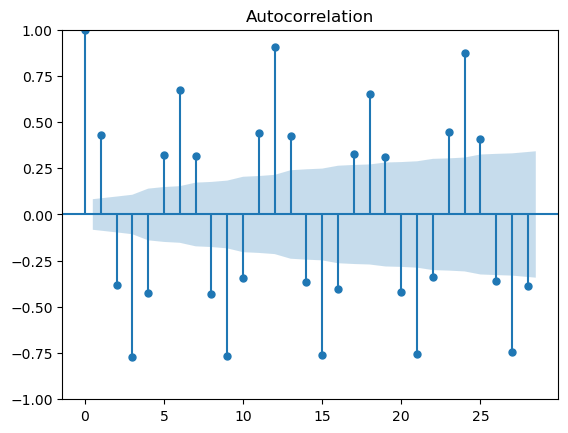

In [33]:
# ACF Plot for 1Month Difference

plot_acf(Electricity_consumption['Electricty_Consumption_in_TW_1Month_Difference'].dropna())
plt.show()

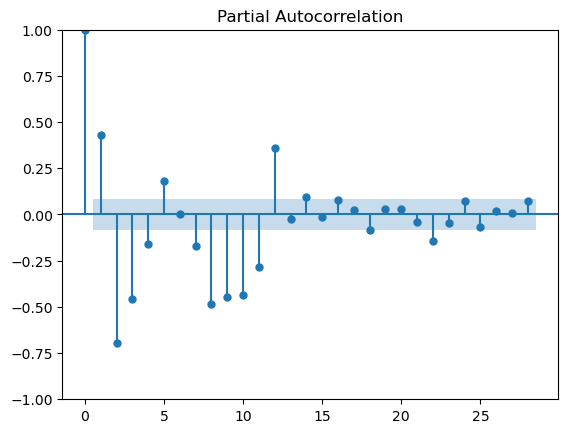

In [34]:
# PACF Plot for 1Month Difference

plot_pacf(Electricity_consumption['Electricty_Consumption_in_TW_1Month_Difference'].dropna())
plt.show()

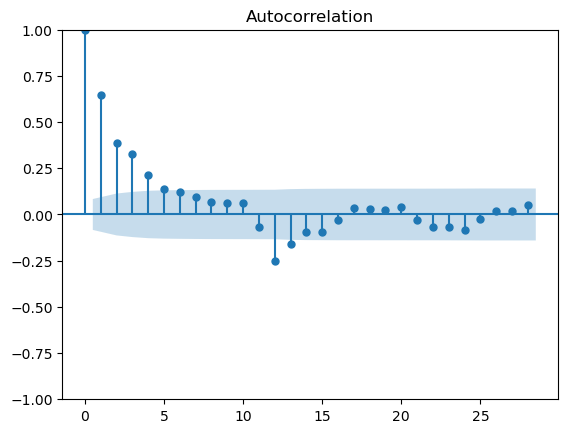

In [35]:
# ACF Plot for seasonal Difference

plot_acf(Electricity_consumption['Electricty_Consumption_in_TW_Seasonal_Difference'].dropna())
plt.show()

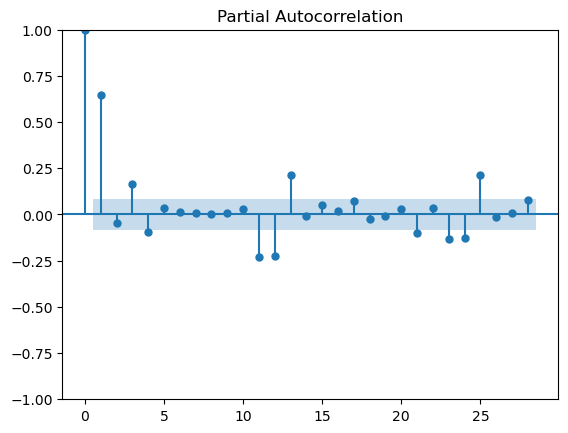

In [36]:
# PACF Plot for Seasonal Difference

plot_pacf(Electricity_consumption['Electricty_Consumption_in_TW_Seasonal_Difference'].dropna())
plt.show()

#### SARIMA

In [37]:
# Importing SARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
sarima_model = SARIMAX(Electricity_consumption['Electricty_Consumption_in_TW'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
sarima_result = sarima_model.fit()

In [40]:
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1106.931
Date:                            Wed, 16 Oct 2024   AIC                           2223.862
Time:                                    01:48:01   BIC                           2245.394
Sample:                                01-01-1973   HQIC                          2232.278
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6169      0.037     16.577      0.000       0.544       0.690
ma.L1         -0.9424      0.018   

In [41]:
actual = Electricity_consumption['Electricty_Consumption_in_TW']['2019-01-01':]

In [42]:
predict = sarima_result.fittedvalues['2019-01-01':]

In [43]:
actual

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [44]:
predict

DATE
2019-01-01    106.245407
2019-02-01    101.802697
2019-03-01     93.904527
2019-04-01     87.755018
2019-05-01     94.380307
2019-06-01    110.603663
2019-07-01    121.180861
2019-08-01    119.830479
2019-09-01    108.402777
dtype: float64

In [46]:
# Importing metrics

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [52]:
print('Mean Absolute Percentage Error - MAPE :', mean_absolute_percentage_error(actual,predict))
print('Root Mean Squared Error - RMSE :', mean_squared_error(actual,predict,squared=False))
print('Root Mean Squared Percentage Error - RMSPE :',np.sqrt(np.mean(np.square((actual - predict) / actual))) * 100)

Mean Absolute Percentage Error - MAPE : 0.0203912595660105
Root Mean Squared Error - RMSE : 2.7935900964479496
Root Mean Squared Percentage Error - RMSPE : 2.6722874891307433


In [53]:
sarima_data = pd.concat([actual,predict],axis=1)
sarima_data.columns = ['Actual','Predict']

In [54]:
sarima_data

,Actual,Predict
DATE,,
2019-01-01,111.8520,106.245407
2019-02-01,97.3261,101.802697
2019-03-01,93.8406,93.904527
2019-04-01,89.1873,87.755018
2019-05-01,97.5860,94.380307
2019-06-01,110.8580,110.603663
2019-07-01,122.1014,121.180861
2019-08-01,121.7765,119.830479
2019-09-01,109.7190,108.402777


<Axes: xlabel='DATE'>

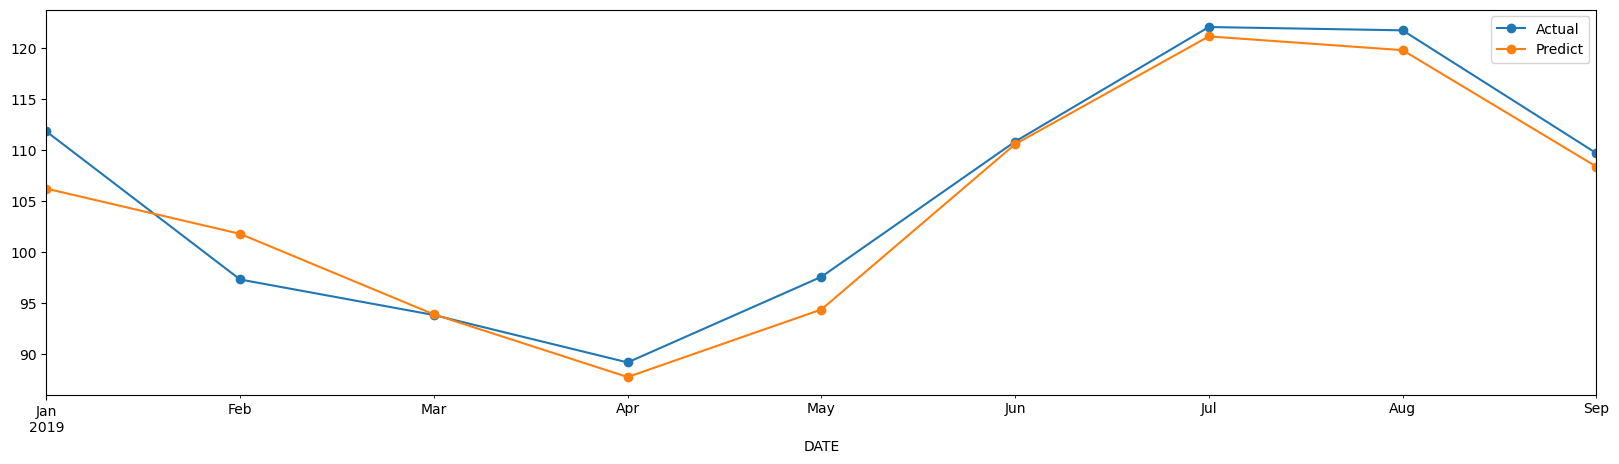

In [55]:
sarima_data.plot(figsize = (20,5),marker='o')

In [56]:
sarima_data1 = Electricity_consumption.copy()

In [57]:
sarima_data1.iloc[500:561,:]

,Electricty_Consumption_in_TW,Electricty_Consumption_in_TW_1Month_Difference,Electricty_Consumption_in_TW_Seasonal_Difference
DATE,,,
2014-09-01,104.3899,-9.9801,1.9714
2014-10-01,93.5507,-10.8392,1.7364
2014-11-01,93.0872,-0.4635,2.6655
2014-12-01,104.1544,11.0672,6.2842
2015-01-01,111.8708,7.7164,7.4956
...,...,...,...
2019-05-01,97.5860,8.3987,4.3499
2019-06-01,110.8580,13.2720,3.7571
2019-07-01,122.1014,11.2434,2.8140


In [58]:
sarima_data1['Forecast'] = sarima_result.predict(start = 500, end = 561, dynamic=True)

<Axes: xlabel='DATE'>

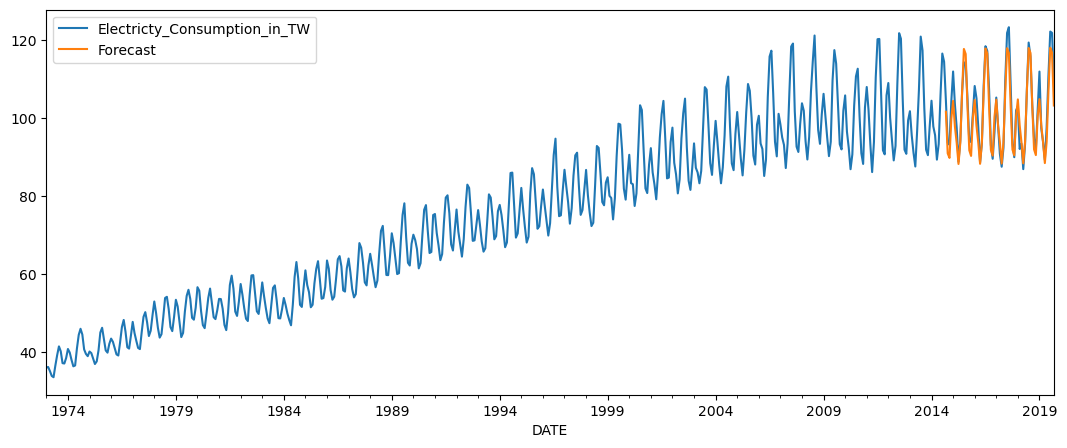

In [59]:
sarima_data1[['Electricty_Consumption_in_TW','Forecast']].plot(figsize = (13,5))

In [60]:
sarima_data_forecast = sarima_result.forecast(steps=24)

In [61]:
sarima_data_forecast

# The demand of electricity for next 1-2 years.

2019-10-01     97.040946
2019-11-01     93.994580
2019-12-01    103.302705
2020-01-01    109.735017
2020-02-01     99.555647
2020-03-01     95.672665
2020-04-01     89.961322
2020-05-01     96.434415
2020-06-01    110.387782
2020-07-01    121.539389
2020-08-01    120.587586
2020-09-01    108.421154
2020-10-01     96.348876
2020-11-01     93.783510
2020-12-01    103.358734
2021-01-01    109.805844
2021-02-01     99.963671
2021-03-01     96.132436
2021-04-01     90.411761
2021-05-01     96.814490
2021-06-01    110.819329
2021-07-01    121.976696
2021-08-01    120.999501
2021-09-01    108.831506
Freq: MS, Name: predicted_mean, dtype: float64

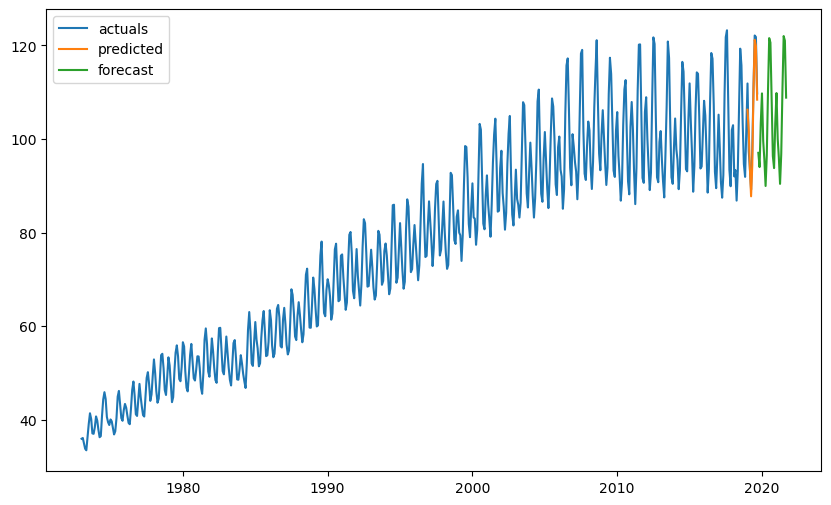

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(Electricity_consumption['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(predict,label='predicted')
plt.plot(sarima_data_forecast,label='forecast')
plt.legend()
plt.show()

In [65]:
# I have selected SARIMA 
# Easy to use compare to others, ARIMA is best for non-seasonal data
# SARIMA handles both Seasonal and non-seasonal component
# Electricity demand varies from season to season. For example,electricity usage is higher in summer (due to air conditioning) and winter (due to heating).
# Like this we have various factors included to forecast the Electricity demand.